In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,roc_curve, auc
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category= UserWarning)
%matplotlib inline

In [2]:
#load data

df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
df.dtypes #data types in columns

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
df.shape

(5110, 12)

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.duplicated().sum() #checking for duplicates

np.int64(0)

In [8]:
df.isna().sum() #checking for missing

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: >

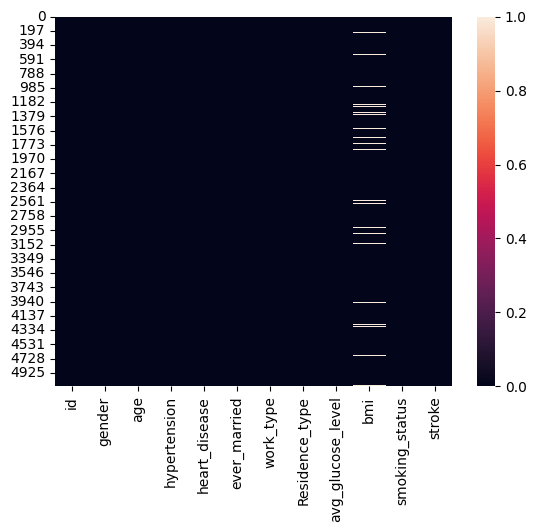

In [9]:
sns.heatmap(df.isna()) #missing values only in bmi spread randomly all across dataset

In [10]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True) #replace missing valuse in bmi with mean
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [11]:
# percentage of the dataset has a history of stroke

df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

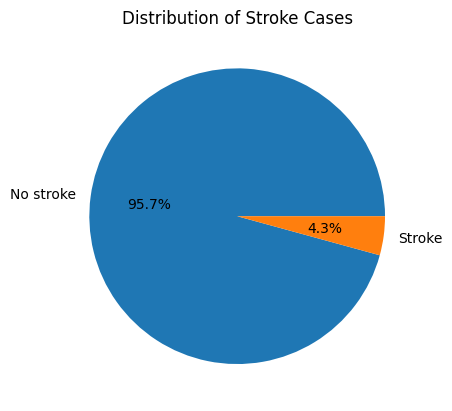

In [12]:
#inbalanced data, presented in pie chart

stroke_count = [4700,209]
labels = ('No stroke', 'Stroke')
plt.pie(stroke_count, labels = labels, autopct = '%1.1f%%')
plt.title('Distribution of Stroke Cases')
plt.show()

In [13]:
#male-to-female ratio
#how does it relate to stroke occurences

df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [14]:
df.drop(df.loc[df['gender'] == 'Other'].index, inplace= True)

In [15]:
stroke_rate_gender = df.groupby('gender')['stroke'].mean()
stroke_rate_gender

gender
Female    0.047094
Male      0.051064
Name: stroke, dtype: float64

In [16]:
stroke_count_gender = stroke_rate_gender*df['gender'].value_counts()
stroke_count_gender

gender
Female    141.0
Male      108.0
dtype: float64

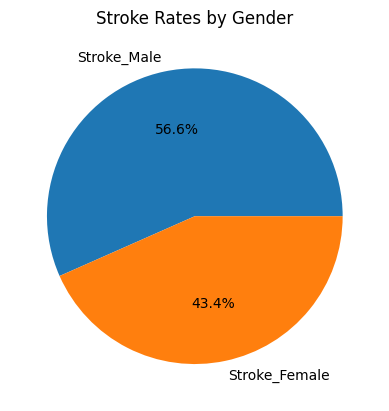

In [17]:
plt.pie(stroke_count_gender, labels = ['Stroke_Male','Stroke_Female'], autopct = '%1.1f%%')
plt.title('Stroke Rates by Gender')
plt.show()

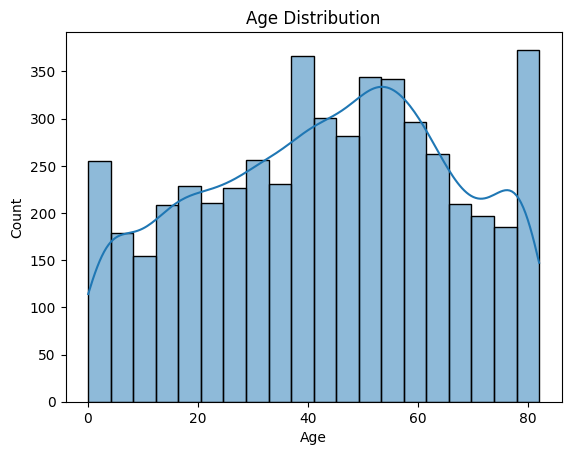

In [18]:
# relationship between age and stroke

sns.histplot(df['age'], kde = True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

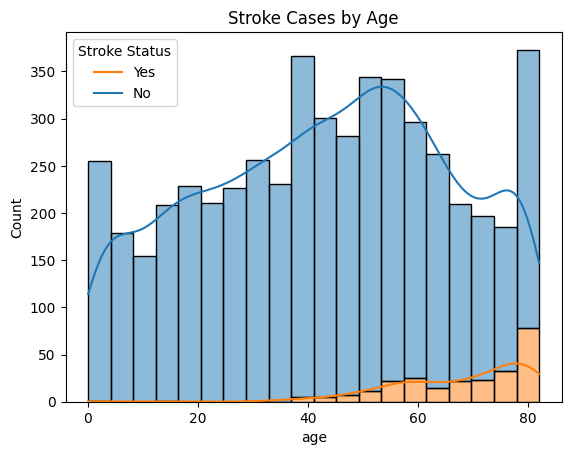

In [19]:
sns.histplot(df, x = 'age', hue = 'stroke', multiple = 'stack',kde=True)
plt.title('Stroke Cases by Age')
plt.legend(title = 'Stroke Status', labels = ['Yes','No'])
plt.show()

In [20]:
#Create age groups
df['age_group'] = pd.cut(df['age'],
                                  bins=[0, 40, 60, 80, 100], 
                                  labels=['<40', '40-60', '60-80', '80+'])
df['age_group']

0       60-80
1       60-80
2       60-80
3       40-60
4       60-80
        ...  
5105    60-80
5106      80+
5107      <40
5108    40-60
5109    40-60
Name: age_group, Length: 5109, dtype: category
Categories (4, object): ['<40' < '40-60' < '60-80' < '80+']

In [21]:
# Calculate stroke rate by age group and gender
age_stroke_rate = df.groupby('age_group')['stroke'].mean().reset_index()
age_stroke_rate

,age_group,stroke
0,<40,0.003567
1,40-60,0.040973
2,60-80,0.129630
3,80+,0.198276


<Figure size 500x500 with 0 Axes>

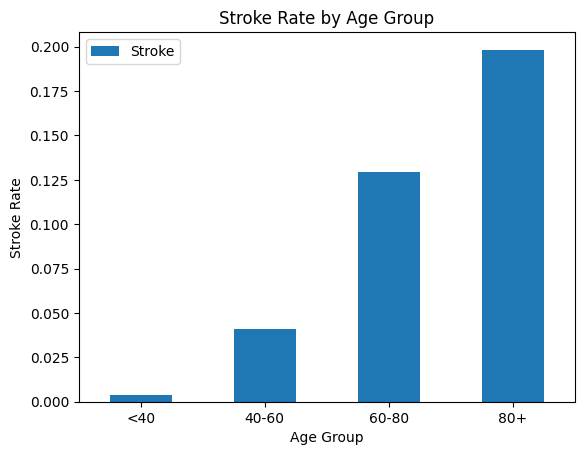

In [22]:
# Plot the stroke rate by age group and gender
plt.figure(figsize=(5, 5))
age_stroke_rate.plot(kind='bar',x ='age_group', stacked=True)
plt.title('Stroke Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Stroke Rate')
plt.xticks(rotation=0)
plt.legend([ 'Stroke'])
plt.show();